In [1]:
datadir ='/Users/krithigamurugavel/Downloads/gem5_validation_project/Spring2020/Hardware_values/'

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [3]:
import matplotlib

In [4]:
system_name = ['gem5','pcm']
calibrations = ['Calib','UnCalib']

all_benchmarks = ['CCa','CCe','CCm','CCl','CCh_st','CRm','CRf','CF1','CS1','CS3','EI','EF','ED1','EM1','EM5',
                     'DP1d','DP1f','DPcvt','DPTd','DPT','MI','MIM','MIM2','MIP','MC','MCS','MI','MIM','MIM2','MIP','MD','ML2','ML2_BW_ld',
                        'ML2_BW_st','MM']

zm_benchmarks = ['CCa','CCe','CCm','CCl','CCh_st','CRm','CRf','CS1','CS3','EI','EF','ED1','EM1','EM5','MI','MC'
                 ,'MCS','MI','MIM','MIM2']

control_cond_benchmarks = ['CCa','CCe','CCm','CCl','CCh_st']

control_benchmarks = ['CRf','CRm','CRd','CS1','CS3']

memory_benchmarks = ['MC','MCS','MI','MIM','MIM2']

mcs =['MC','MCS']

execution_benchmarks = ['EI','EF','ED1','EM1','EM5']


In [5]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '',filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
       # print(r[start:end])
        return float(r[start:end])

In [6]:
#Function to extract stats from PCM
def pcmGetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 2
        end = r.find('\n', start)
       # print(r[start:end])
        return float(r[start:end])


## GEM5 DATAFRAME

In [7]:
rows = []
for calibs in calibrations:
    for bm in zm_benchmarks:
        rows.append([calibs,bm,gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_ticks')/333, #1000
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_insts'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'sim_ops'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'host_op_rate'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_rate::total'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.ipc'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condPredicted'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.branchPred.condIncorrect'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branchMispredicts'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.commit.branches'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_misses::total'),
                     gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_hits::total'),
                       gem5GetStat(system_name[0]+'/'+calibs+'/'+bm,'system.cpu.dcache.overall_miss_latency::total')
                    ])

gem5_df = pd.DataFrame(rows, columns=['Calibs','benchmark','cycles', 'instructions', 'ops','host_op_rate', 'overall_missrate',
                                     'ipc','CondPred','CondIndirect','Total_mispred','Total_branches','overall_l1d_miss','overall_l1d_hits','overall_l1_latency'])
gem5_df['Cond_branch_mispred'] = gem5_df['CondIndirect']/gem5_df['CondPred']
gem5_df['Total_branch_mispred'] =gem5_df['Total_mispred']/gem5_df['Total_branches']



## PCM DATAFRAME

In [8]:
rows =[]

#IPC,Branch_total, branch_total_miss,Cond_total,Cond_Miss,Memory_loads_miss, Memory__FB_hits, Total_load_memory,
#RFO_L2hits,RFO_l2miss, Total_store

for bm in control_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'IPC'),
                    pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_TOTAL_INSTR_RETIRED_events'),
                    pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_TOTAL_events'),
                    None,None,
                    None,None,None,None,None,None
                ])
    
for bm in control_cond_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                 None,None,
                 pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_COND_INSTR_RETIRED_events'),
                 pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm,'BRANCH_MISSES_RETIRED_events'),  
                 None,None,None,None,None,None
                ])
    
for bm in execution_benchmarks:
    rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                 None,None,None,None,
                 None,None,None,None,None,None
                ])
    
for bm in memory_benchmarks:
        rows.append([bm,pcmGetStat(system_name[1]+'/'+'microbench_all'+'/'+bm, 'IPC'),
                     None,None,
                     None,None,
                     None,None,None,None,None,None])
        
for bm in memory_benchmarks:
    rows.append([bm,None,
                    None,None,
                    None,None,
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_LOAD_RETIRED_L1_MISS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_LOAD_RETIRED_FB_HIT'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_INST_RETIRED_ALL_LOADS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'RFO_L2HITS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'RFO_L2MISS'),
                    pcmGetStat(system_name[1]+'/'+'L1D_benchmarks'+'/'+bm,'MEM_INST_RETIRED_ALL_STORES'),
                ])
        

pcm_df = pd.DataFrame(rows, columns=['benchmark',
                                     'ipc','Total_branches','Total_mispred','CondTotal','CondPred','L1_load_miss','FB_hit',
                                     'Total_loads','RFO_L2_hits','RFO_L2_miss','Total_stores'])

pcm_df['Total_branch_mispred'] = pcm_df['Total_mispred']/pcm_df['Total_branches']

pcm_df['Cond_branch_mispred'] =pcm_df['CondPred']/pcm_df['CondTotal']

pcm_df['Total_L1_misses'] = (pcm_df['L1_load_miss'] ) + (pcm_df['RFO_L2_hits'] + pcm_df['RFO_L2_miss']) 

pcm_df['Total_access'] = (pcm_df['Total_loads']+pcm_df['Total_stores'])

pcm_df['L1_missrate'] = (pcm_df['Total_L1_misses']) /pcm_df['Total_access']



In [9]:
## Stacked Graph
def doplot_stacked_benchmarks(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = system_name
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
            d=pcm_df[pcm_df['benchmark']==bm]
            g=gem5_df[gem5_df['benchmark']==bm]
            ax.bar(i,d[stat_pcm], color='C'+str(1))
            ax.bar(i,g[stat_gem5], color='C'+str(0))
            i=i+1
        
    for i,s in enumerate(system):
        ax.bar(0,0,color='C'+str(i), label=s)
    new_names = benchmark_names + benchmark_names + benchmark_names
    plt.xticks(np.arange(len(benchmark_names)), benchmark_names, rotation=40, ha='right')

In [10]:
##Graph
def doplot_benchmarks(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = ['pcm','gem5_UnCalib', 'gem5_Calib']
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d=pcm_df[pcm_df['benchmark']==bm]
        g=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']=='UnCalib')]
        g1=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']=='Calib')]
        ax.bar(i,d[stat_pcm], color='C'+str(0))
        i=i+1
        ax.bar(i,g[stat_gem5], color='C'+str(1))
        i=i+1
        ax.bar(i,g1[stat_gem5], color='C'+str(2))
        i=i+3
        
    for j,s in enumerate(system):
        ax.bar(0,0,color='C'+str(j), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+2)+j/2, benchmark_names, rotation=40, ha='right')

In [11]:
##Graph
def doplot_benchmarks1(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = ['pcm','gem5']
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d=pcm_df[pcm_df['benchmark']==bm]
        #g=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']=='Calib')]
        g1=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']=='UnCalib')]
        ax.bar(i,d[stat_pcm], color='C'+str(0))
        i=i+1
        ax.bar(i,g1[stat_gem5], color='C'+str(1))
        i=i+2
        
    for j,s in enumerate(system):
        ax.bar(0,0,color='C'+str(j), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1)+j/2, benchmark_names, rotation=40, ha='right')

In [12]:
##Graph
def doplot_benchmarks2(benchmarks,benchmark_names,stat_pcm,stat_gem5):
    system = ['pcm','gem5']
    fig,ax = plt.subplots()
    i = 0
    for bm in benchmarks:
        d=pcm_df[pcm_df['benchmark']==bm]
        #g=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']=='Calib')]
        g1=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']=='Calib')]
        ax.bar(i,d[stat_pcm], color='C'+str(0))
        i=i+1
        ax.bar(i,g1[stat_gem5], color='C'+str(1))
        i=i+2
        
    for j,s in enumerate(system):
        ax.bar(0,0,color='C'+str(j), label=s)
    plt.xticks(np.arange(len(benchmark_names))*(len(system)+1)+j/2, benchmark_names, rotation=40, ha='right')

## IPC

<IPython.core.display.Javascript object>


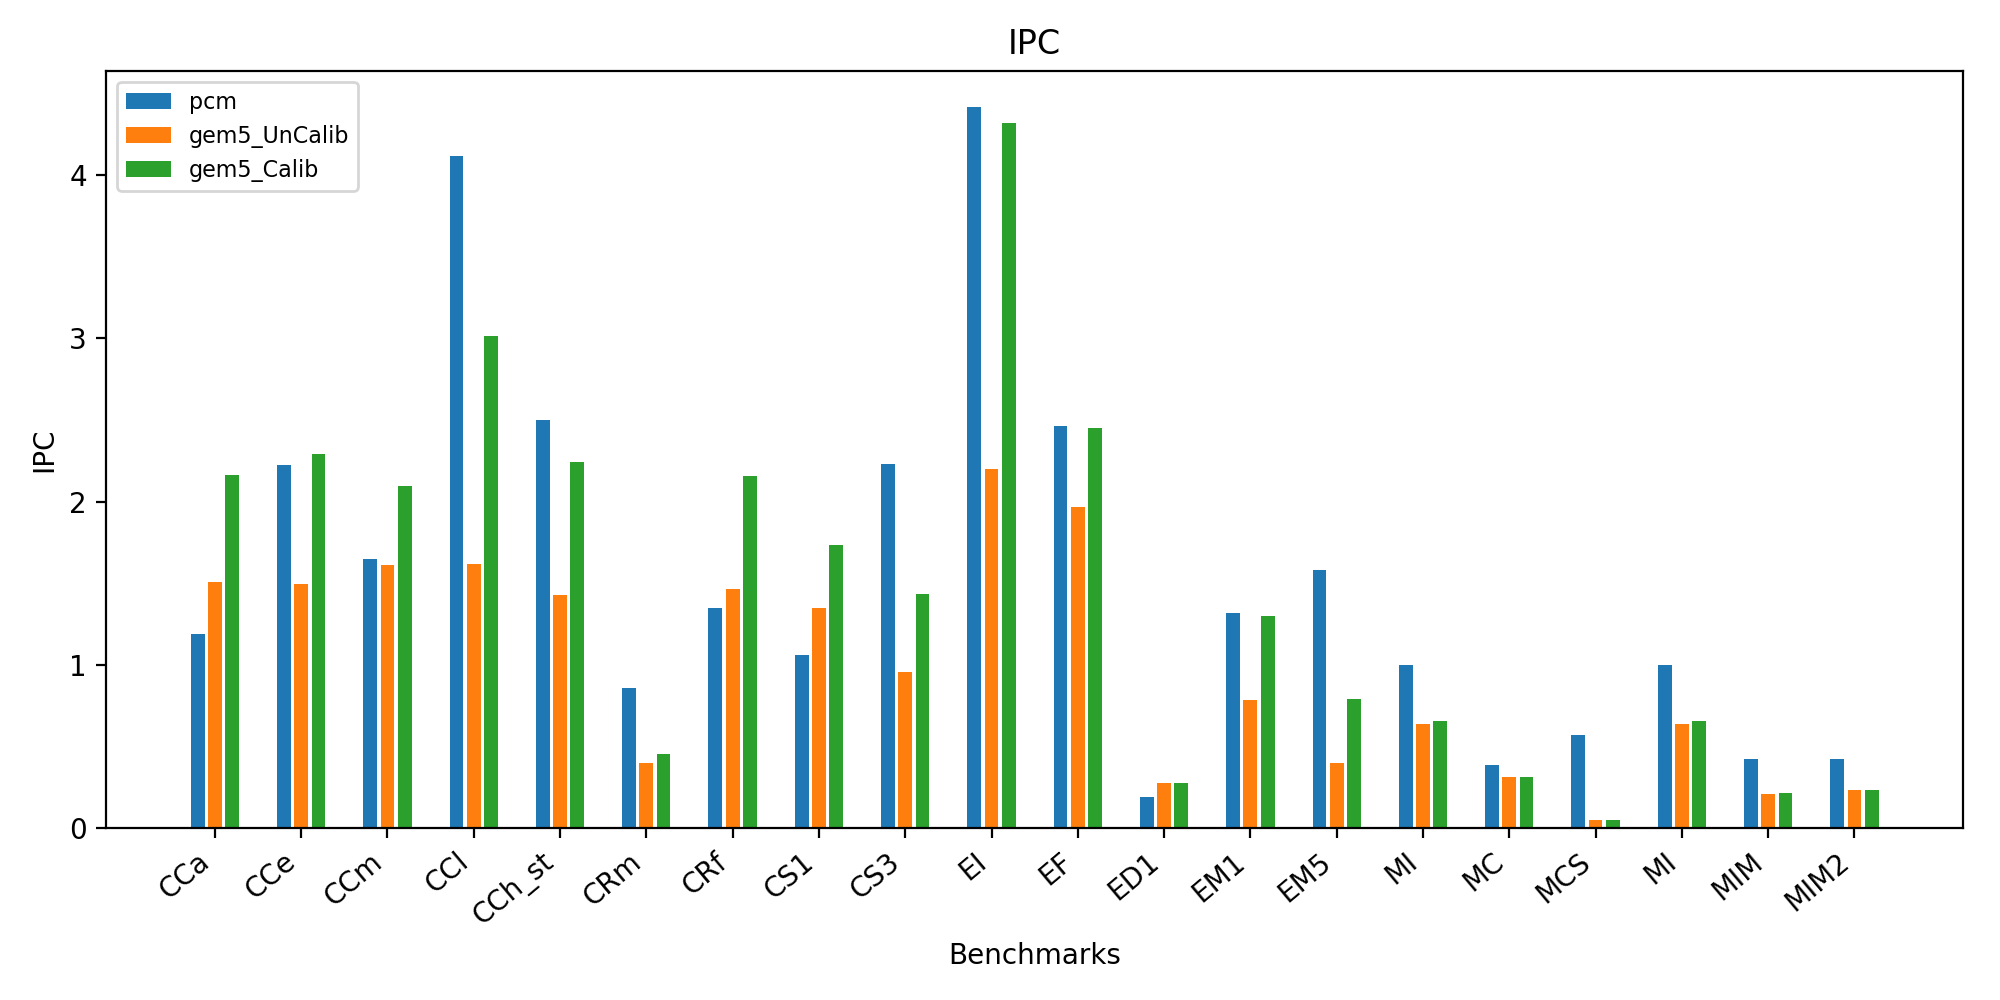

In [13]:
#IPC

benchmarks = zm_benchmarks
benchmark_names = zm_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'ipc','ipc')
plt.ylabel('IPC')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC')
plt.tight_layout()
plt.savefig('IPC_hw+gem5.png', format='png', dpi=600)


<IPython.core.display.Javascript object>


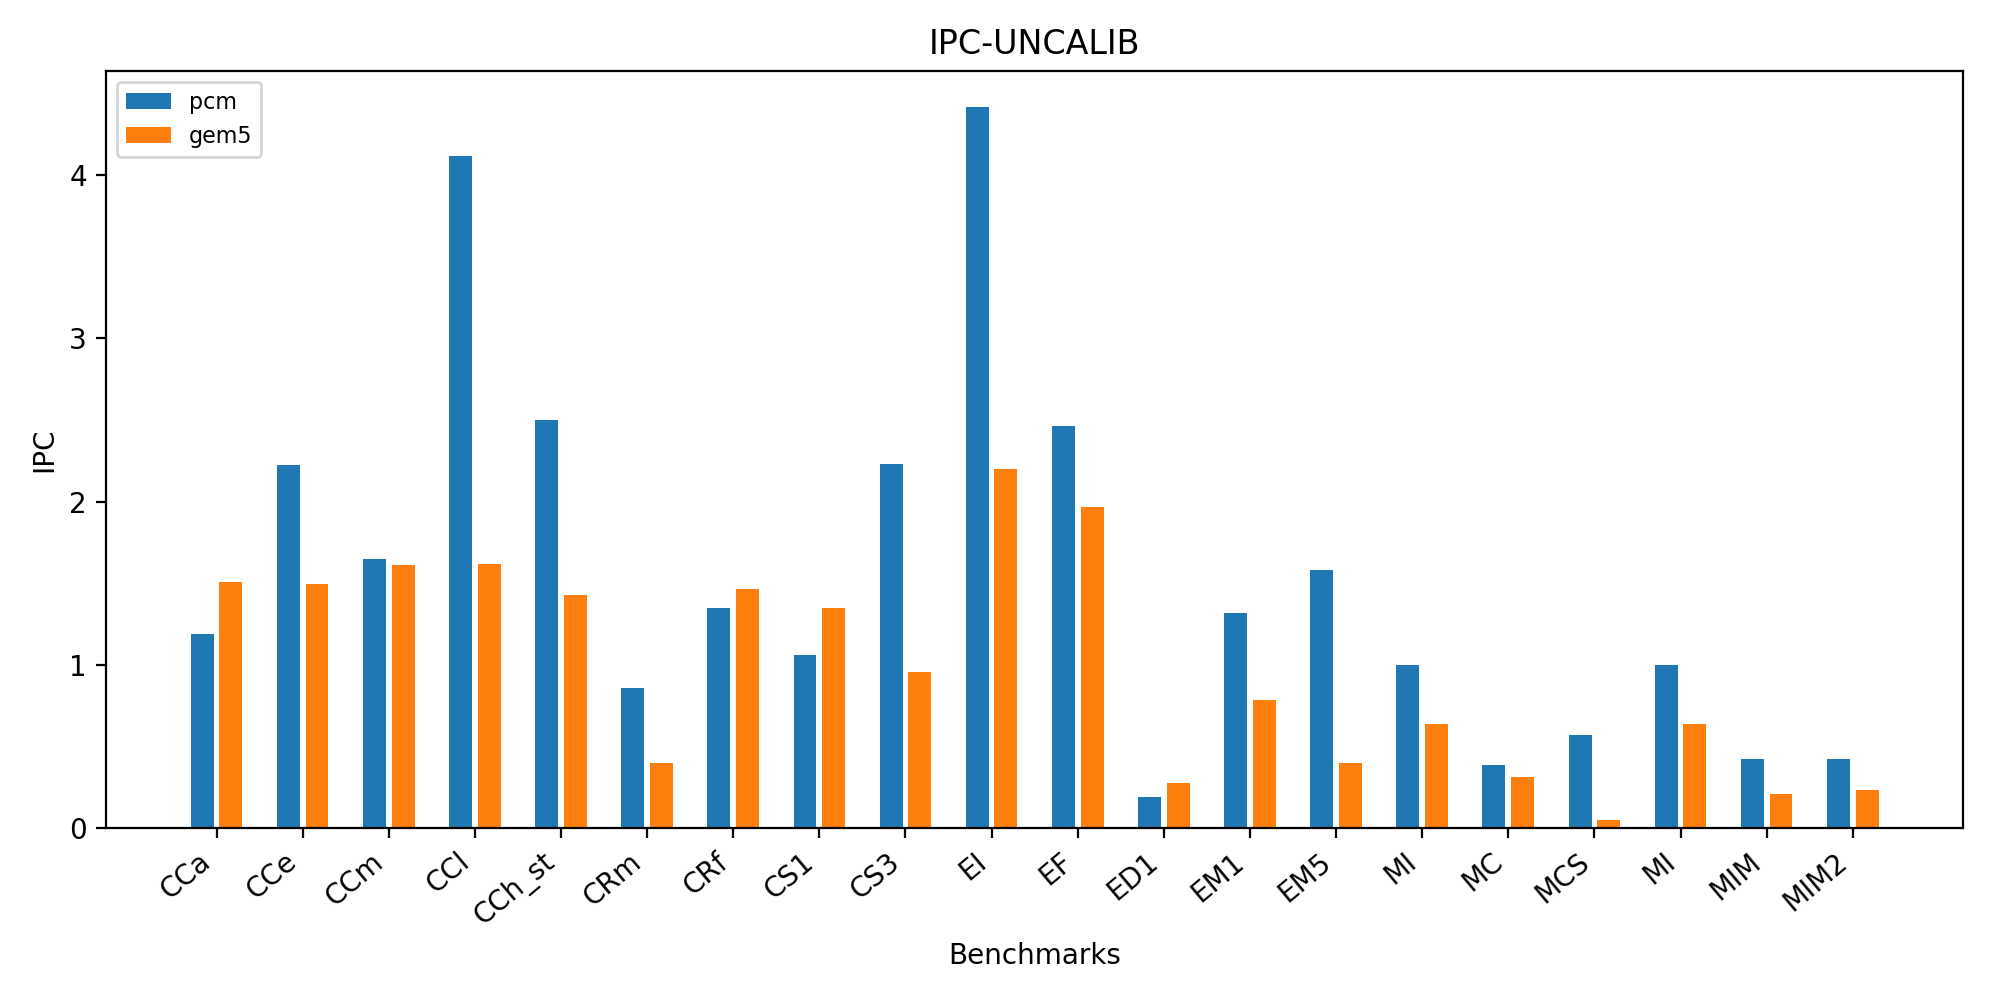

In [14]:
#IPC UNCALIB

benchmarks = zm_benchmarks
benchmark_names = zm_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks1(benchmarks,benchmark_names,'ipc','ipc')
plt.ylabel('IPC')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC-UNCALIB')
plt.tight_layout()
plt.savefig('IPC_hw+gem5.png', format='png', dpi=600)

<IPython.core.display.Javascript object>


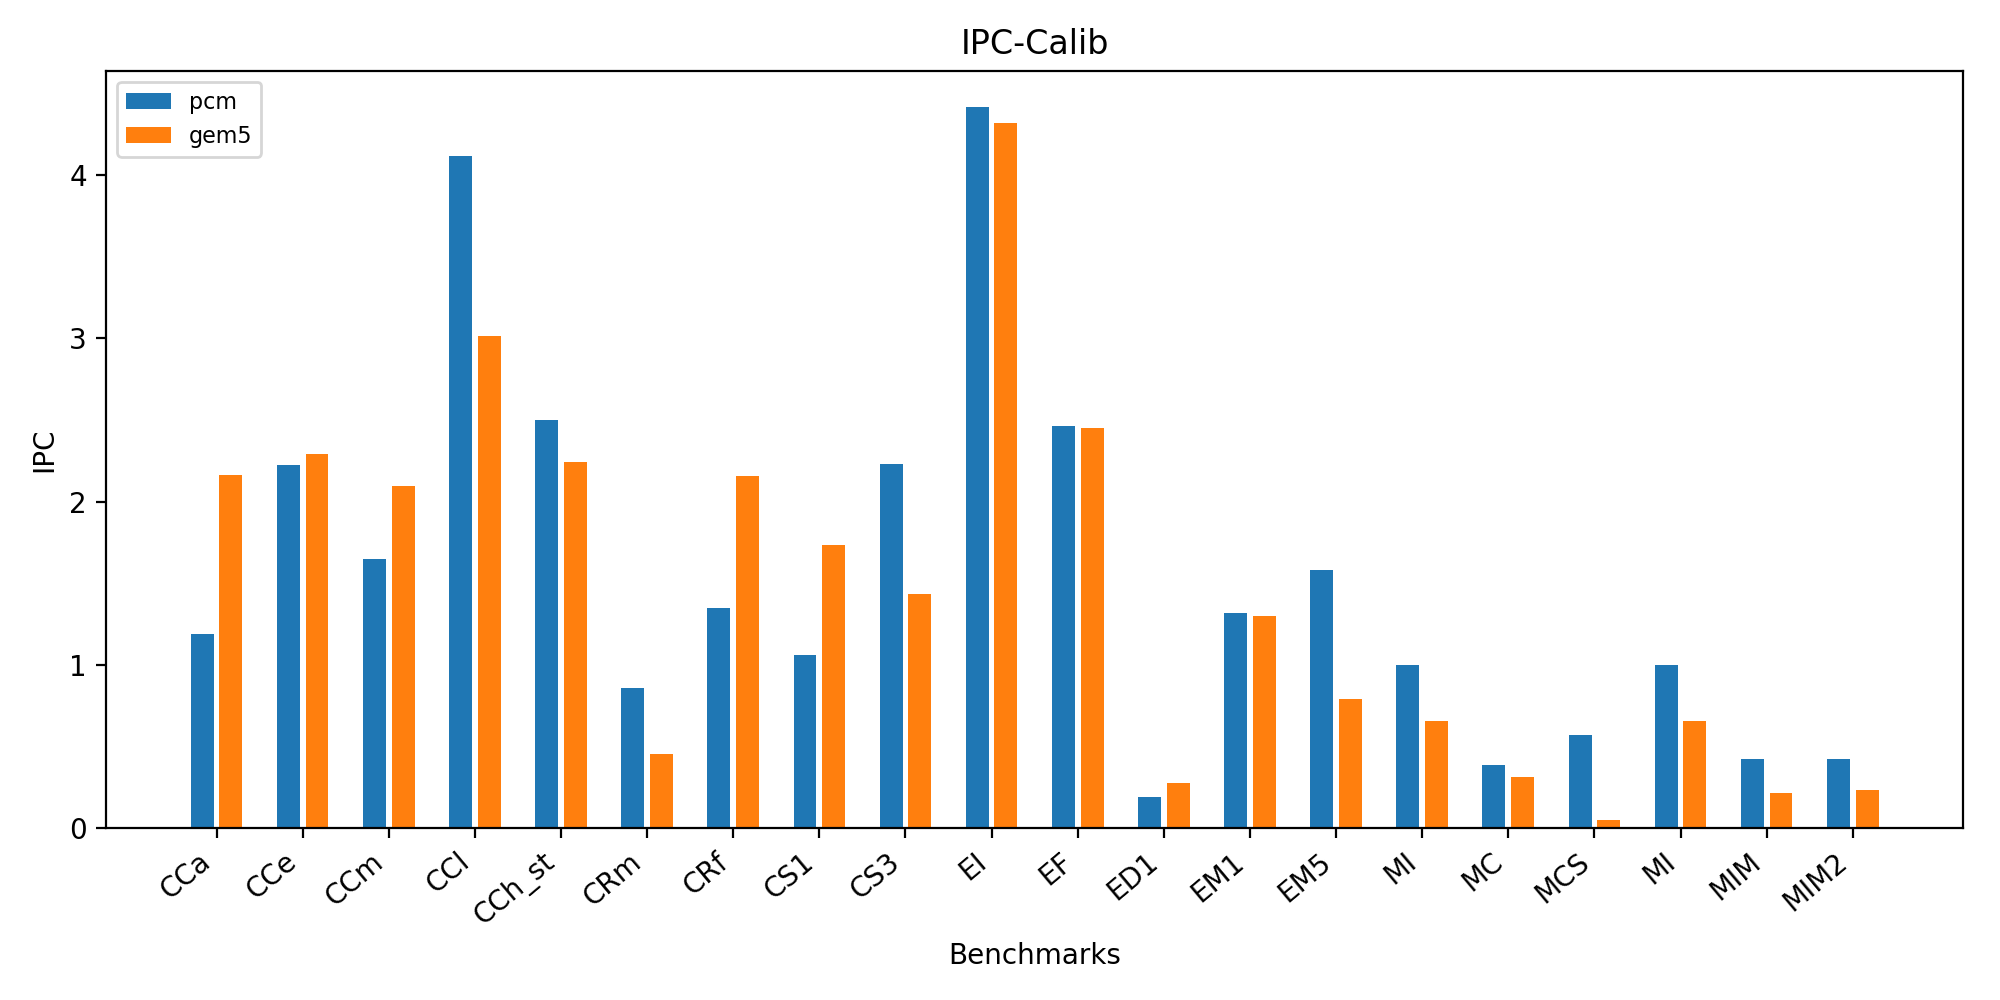

In [15]:
#IPC CALIB

benchmarks = zm_benchmarks
benchmark_names = zm_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks2(benchmarks,benchmark_names,'ipc','ipc')
plt.ylabel('IPC')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC-Calib')
plt.tight_layout()
plt.savefig('IPC_hw+gem5.png', format='png', dpi=600)

## Control conditonal branch misses

<IPython.core.display.Javascript object>


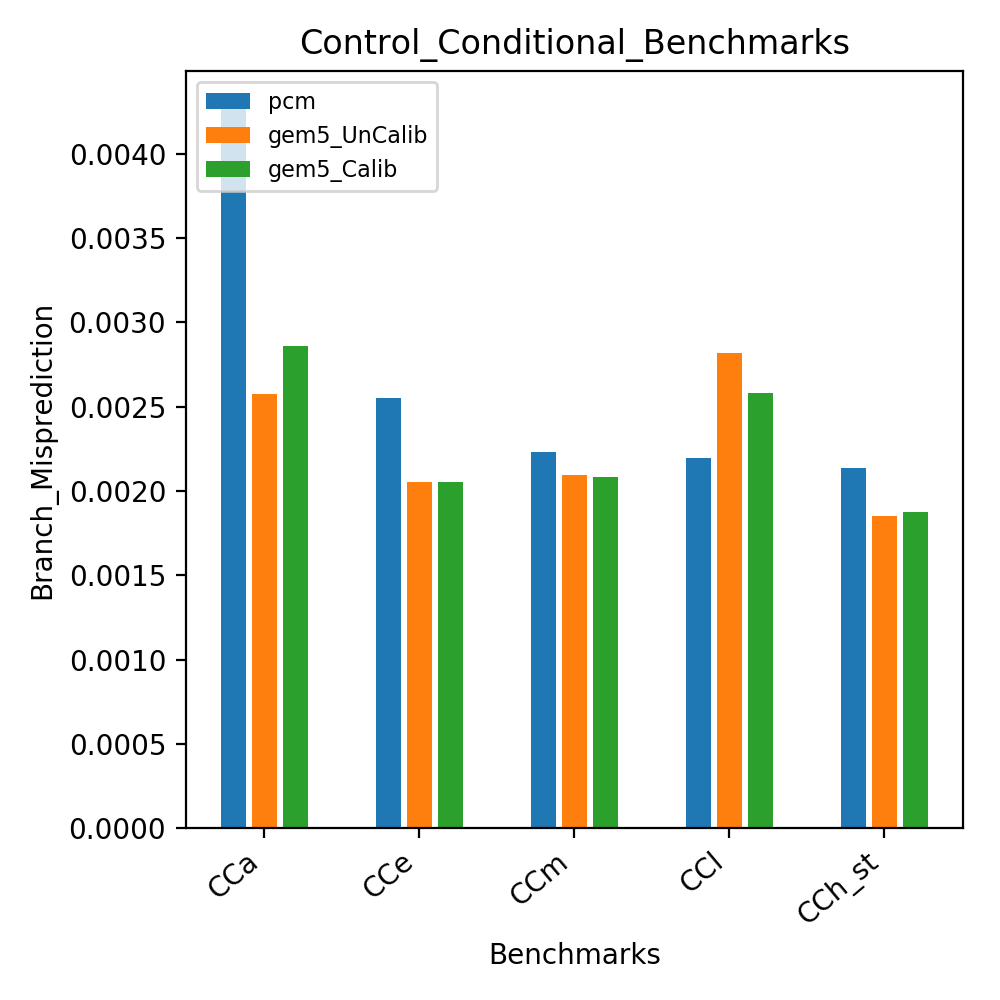

In [16]:
#Control condiitonal branch misses

benchmarks = control_cond_benchmarks
benchmark_names = control_cond_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'Cond_branch_mispred','Cond_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Conditional_Benchmarks')
plt.tight_layout()
plt.savefig('Branch_Misprediction_Cc_hw+gem5.png', format='png', dpi=600)

## Control Branch misses

<IPython.core.display.Javascript object>


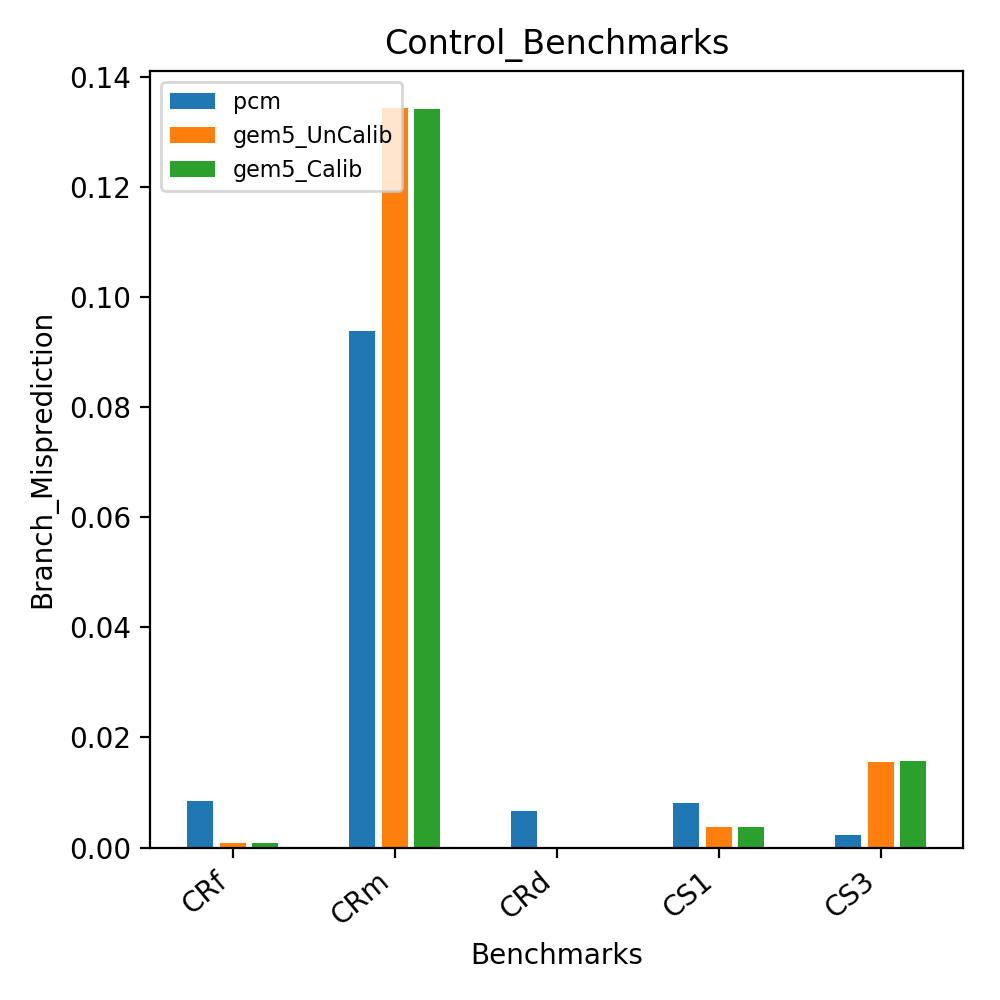

In [17]:
#Control Branch misses

benchmarks = control_benchmarks
benchmark_names = control_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'Total_branch_mispred','Total_branch_mispred')
plt.ylabel('Branch_Misprediction')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Control_Benchmarks')
plt.tight_layout()
plt.savefig('Branch_Misprediction_hw+gem5.png', format='png', dpi=600)

## L1 misses

<IPython.core.display.Javascript object>


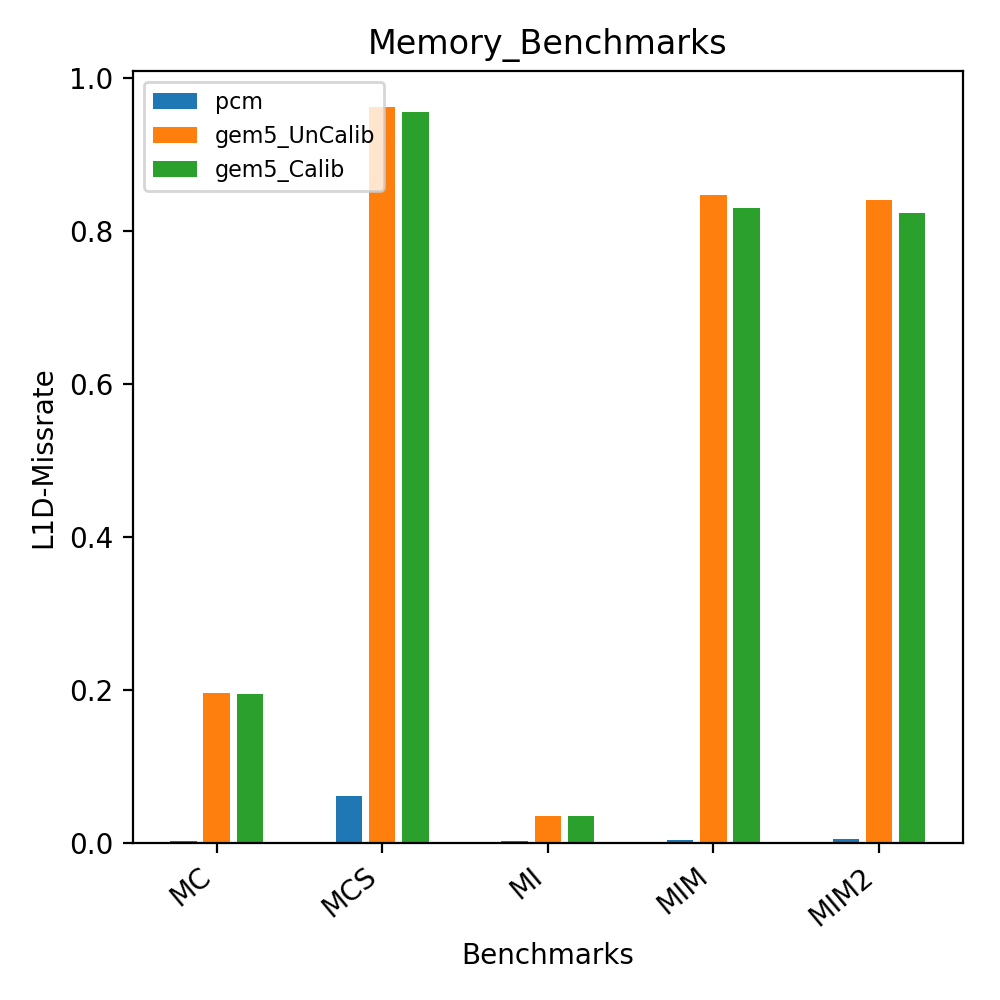

In [18]:
#L1 misses

benchmarks = memory_benchmarks
benchmark_names = memory_benchmarks
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,'L1_missrate','overall_missrate')
plt.ylabel('L1D-Missrate')
plt.xlabel('Benchmarks')
plt.legend(loc=2, prop={'size': 8})
plt.title('Memory_Benchmarks')
plt.tight_layout()
plt.savefig('Memory_hw+gem5.png', format='png', dpi=600)

## AVERAGE ERROR GRAPH:

In [22]:
#AVERAGE ERROR GRAPH:

def doplot_benchmarks_avg(categories, cat_1,cat_2,cat_3):
    gem5_df['Total_average_ipc'] = abs(gem5_df['ipc']-pcm_df['ipc'])
    system = ['UnCalib','Calib']
    fig,ax = plt.subplots()
    i = 0
    
    j=0
    for sys in system:
        Total_sum = 0;
        count =0;
        for bm in cat_1:
            count=count+1
            d=pcm_df[pcm_df['benchmark']==bm]
            g=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']==sys)]
            Total_sum = Total_sum+abs(d['ipc'].iloc[0] - g['ipc'].iloc[0])  
        average = (Total_sum/count)
        ax.bar(i,average, color='C'+str(j))
        j=j+1
        i=i+1
        
    i=i+1
    
    j=0
    for sys in system:
        Total_sum = 0;
        count =0;
        for bm in cat_2:
            count=count+1
            d=pcm_df[pcm_df['benchmark']==bm]
            g=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']==sys)]
            Total_sum = Total_sum+abs(d['ipc'].iloc[0] - g['ipc'].iloc[0])  
        average = (Total_sum/count)
        ax.bar(i,average, color='C'+str(j))
        j=j+1
        i=i+1
    i=i+1
    
    j=0
    for sys in system:
        Total_sum = 0;
        count =0;
        for bm in cat_3:
            count=count+1
            d=pcm_df[pcm_df['benchmark']==bm]
            g=gem5_df[(gem5_df['benchmark']==bm) & (gem5_df['Calibs']==sys)]
            Total_sum = Total_sum+abs(d['ipc'].iloc[0] - g['ipc'].iloc[0])  
        average = (Total_sum/count)
        ax.bar(i,average, color='C'+str(j))
        j=j+1
        i=i+1
    i=i+1

        

    for j,s in enumerate(system):
        ax.bar(0,0,color='C'+str(j), label=s)
    plt.xticks(np.arange(len(categories))*(len(system)+1)+j/2,categories, rotation=40, ha='right')


<IPython.core.display.Javascript object>


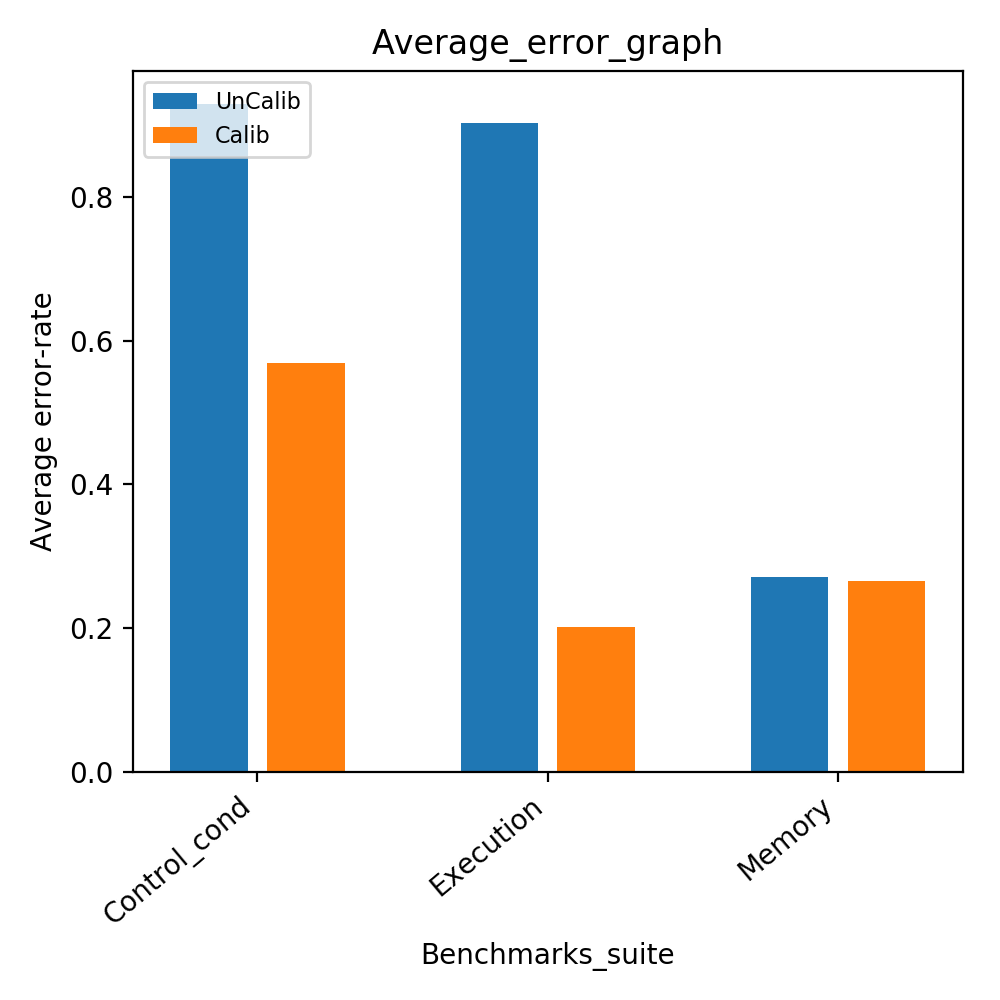

In [23]:
#average graph
control_cond_benchmarks = ['CCa','CCe','CCm','CCh_st','CCl']
control_benchmarks = ['CS1','CS3','CRm','CRf']
Memory_benchmarks =['MC','MCS','MI','MIM','MIM2']
Execution_benchmarks =['EI','EF','ED1','EM1','EM5']
categories =['Control_cond','Execution','Memory']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks_avg(categories,control_cond_benchmarks,Execution_benchmarks,Memory_benchmarks)
plt.ylabel('Average error-rate')
plt.xlabel('Benchmarks_suite')
plt.legend(loc=2, prop={'size': 8})
plt.title('Average_error_graph')
plt.tight_layout()
plt.savefig('Average_graph_gem5.png', format='png', dpi=600)
